In [ ]:
2023shool_health.xlsx

In [6]:
pip install openpyxl     

Note: you may need to restart the kernel to use updated packages.


In [76]:
import pandas as pd

file_path = '2023shool_health.xlsx'
data = pd.read_excel(file_path)

print(data.head())
print(data.info())

    학년도       최종가중치  학교ID    도시규모  공학여부  시도 학교급  학년  반  순번  ... 가족흡연 가족음주  \
0  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   1  ...  2.0  2.0   
1  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   2  ...  2.0  2.0   
2  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   3  ...  2.0  2.0   
3  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   4  ...  1.0  2.0   
4  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   5  ...  1.0  2.0   

  흡연음주전문가상담희망  무기력감  수업태도교정 과잉행동  주의력산만  성문제전문가상담희망  진로고민  상담요청  
0         NaN   2.0     2.0  2.0    2.0         NaN   NaN   2.0  
1         NaN   2.0     2.0  2.0    2.0         NaN   NaN   2.0  
2         NaN   2.0     2.0  2.0    2.0         NaN   NaN   2.0  
3         NaN   2.0     2.0  2.0    2.0         NaN   NaN   2.0  
4         NaN   2.0     2.0  2.0    2.0         NaN   NaN   2.0  

[5 rows x 109 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87182 entries, 0 to 87181
Columns: 109 entries, 학년도 to 상담요청
dtypes:

In [6]:
import pandas as pd

# 각 열별 결측치 개수 확인
missing_values = data.isnull().sum()

# 모든 결측치 출력
print("각 열별 결측치 개수:")
print(missing_values)

# 결측치가 있는 열만 보기 
missing_values_filtered = missing_values[missing_values > 0]
print("\n결측치가 있는 열만 보기:")
print(missing_values_filtered)

각 열별 결측치 개수:
학년도               0
최종가중치             0
학교ID              0
도시규모              0
공학여부              0
              ...  
과잉행동          78758
주의력산만         78864
성문제전문가상담희망    35364
진로고민          35346
상담요청           2526
Length: 109, dtype: int64

결측치가 있는 열만 보기:
척추            56705
시력_나안_좌       67880
시력_나안_우       67893
시력_교정_좌       75951
시력_교정_우       75958
              ...  
과잉행동          78758
주의력산만         78864
성문제전문가상담희망    35364
진로고민          35346
상담요청           2526
Length: 94, dtype: int64


In [8]:
# 데이터 전체적인 정보 확인
print("데이터 크기 (rows, columns):", data.shape) 
print("\n데이터 타입 정보:")
print(data.info()) 
print("\n기본 통계량:")
print(data.describe()) 
print("\n컬럼명:")
print(data.columns)  

데이터 크기 (rows, columns): (87182, 109)

데이터 타입 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87182 entries, 0 to 87181
Columns: 109 entries, 학년도 to 상담요청
dtypes: float64(71), int64(5), object(33)
memory usage: 72.5+ MB
None

기본 통계량:
           학년도         최종가중치          학교ID            학년             반  \
count  87182.0  87182.000000  87182.000000  87182.000000  87182.000000   
mean    2023.0     60.217568    541.967551      2.570863      1.864789   
std        0.0     50.090581    355.910644      1.460686      1.961251   
min     2023.0      3.723121      5.000000      1.000000      1.000000   
25%     2023.0     29.480546    208.000000      1.000000      1.000000   
50%     2023.0     42.708873    518.000000      2.000000      1.000000   
75%     2023.0     69.592912    856.000000      3.000000      2.000000   
max     2023.0    415.897737   1169.000000      6.000000     23.000000   

                 순번             키           몸무게       시력_나안_좌       시력_나안_우  \
count  87182.000

## 문제 정의 – EDA 과정 – 데이터 전처리 – 데이터 분석 방법 – 분석 주제와 난이도 – 발표 / 질의 응답
### 전체 주제 : BMI와 시력 , 혈당 , 질병 등 관계가 있는지 확인해보고자 함 

### 주제: 나안시력(교정하지 않은 시력)이 낮을수록 BMI가 높은 경향이 있는지 분석.

---------
#### 참고 
####  정상 시력: 1.0 이상,  저시력: 0.5 이하. 고시력: 1.5 이상.



In [25]:
select_content1 = ['시력_나안_좌', '시력_나안_우']
select_content2 = ['시력_교정_좌', '시력_교정_우']

analysis_data = data[select_content1]
print(analysis_data.describe(()))

            시력_나안_좌       시력_나안_우
count  19302.000000  19289.000000
mean       0.929347      0.922139
std        0.365063      0.383473
min        0.000000      0.000000
50%        1.000000      1.000000
max        2.000000     15.000000


In [29]:
filtered_data = data.dropna(subset=['시력_나안_좌', '시력_나안_우']).copy()  

# BMI 계산 
filtered_data['키_m'] = filtered_data['키'] / 100  # cm를 m로 변환
filtered_data['BMI'] = filtered_data['몸무게'] / (filtered_data['키_m'] ** 2)

print(filtered_data.head())

    학년도       최종가중치  학교ID    도시규모  공학여부  시도 학교급  학년  반  순번  ... 흡연음주전문가상담희망  \
0  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   1  ...         NaN   
1  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   2  ...         NaN   
2  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   3  ...         NaN   
3  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   4  ...         NaN   
4  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   5  ...         NaN   

  무기력감 수업태도교정  과잉행동  주의력산만 성문제전문가상담희망  진로고민  상담요청    키_m        BMI  
0  2.0    2.0   2.0    2.0        NaN   NaN   2.0  1.107  15.667728  
1  2.0    2.0   2.0    2.0        NaN   NaN   2.0  1.125  15.644444  
2  2.0    2.0   2.0    2.0        NaN   NaN   2.0  1.253  15.159148  
3  2.0    2.0   2.0    2.0        NaN   NaN   2.0  1.161  22.701628  
4  2.0    2.0   2.0    2.0        NaN   NaN   2.0  1.194  14.870556  

[5 rows x 111 columns]


In [31]:
print(filtered_data[['키', '몸무게', 'BMI','시력_나안_좌', '시력_나안_우']])

                키        몸무게        BMI  시력_나안_좌  시력_나안_우
0      110.699997  19.200001  15.667728      1.2      1.2
1      112.500000  19.799999  15.644444      1.2      1.2
2      125.300003  23.799999  15.159148      0.7      0.7
3      116.099998  30.600000  22.701628      1.2      1.2
4      119.400002  21.200001  14.870556      1.2      1.2
...           ...        ...        ...      ...      ...
87127  135.199997  28.200001  15.427507      1.0      1.0
87128  148.399994  47.700001  21.659609      1.5      1.2
87129  150.000000  41.000000  18.222222      1.5      2.0
87130  153.399994  65.400002  27.792465      1.5      0.9
87132  153.600006  41.700001  17.674763      0.7      0.7

[19275 rows x 5 columns]


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

eda_summary = filtered_data[['키', '몸무게', 'BMI', '시력_나안_좌', '시력_나안_우']].describe()
print(eda_summary)

                  키           몸무게           BMI       시력_나안_좌       시력_나안_우
count  19275.000000  19275.000000  19275.000000  19275.000000  19275.000000
mean     147.765687     45.617188     19.920077      0.929679      0.922451
std       19.251213     19.015709      4.454262      0.364849      0.383210
min      103.699997     14.100000      6.135429      0.000000      0.000000
25%      130.000000     29.200001     16.561137      0.700000      0.700000
50%      151.000000     44.599998     19.143164      1.000000      1.000000
75%      163.500000     57.700001     22.327509      1.200000      1.200000
max      197.699997    139.699997     45.773129      2.000000     15.000000


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

print("기술 통계량")
print(filtered_data[['시력_나안_좌', '시력_나안_우', 'BMI']].describe())


기술 통계량
            시력_나안_좌       시력_나안_우           BMI
count  19275.000000  19275.000000  19275.000000
mean       0.929679      0.922451     19.920077
std        0.364849      0.383210      4.454262
min        0.000000      0.000000      6.135429
25%        0.700000      0.700000     16.561137
50%        1.000000      1.000000     19.143164
75%        1.200000      1.200000     22.327509
max        2.000000     15.000000     45.773129


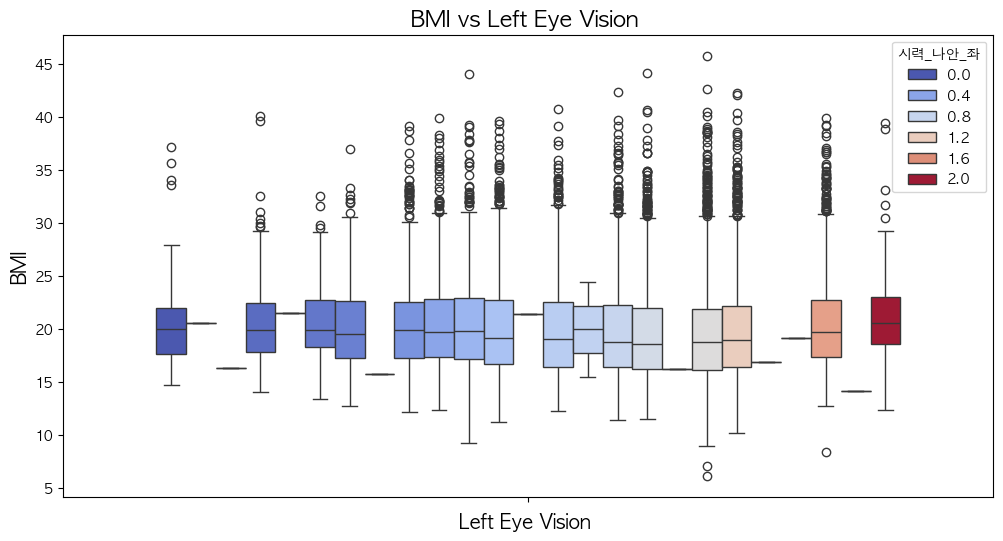

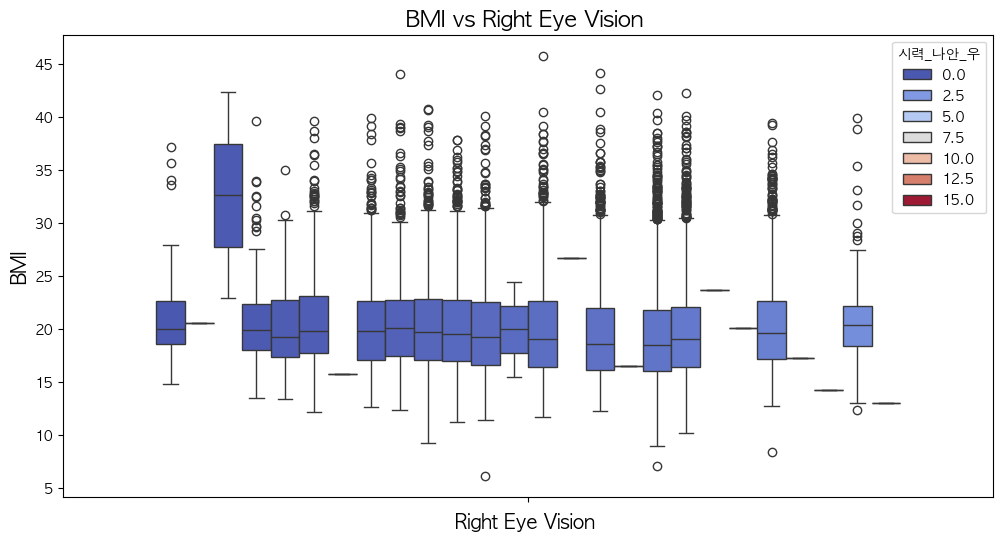

In [63]:
# BMI 분포를 나안시력 기준으로 박스플롯
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, hue='시력_나안_좌', y='BMI', palette='coolwarm')
plt.title('BMI vs Left Eye Vision ', fontsize=16)
plt.xlabel('Left Eye Vision ', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, hue='시력_나안_우', y='BMI', palette='coolwarm')
plt.title('BMI vs Right Eye Vision ', fontsize=16)
plt.xlabel('Right Eye Vision ', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.show()

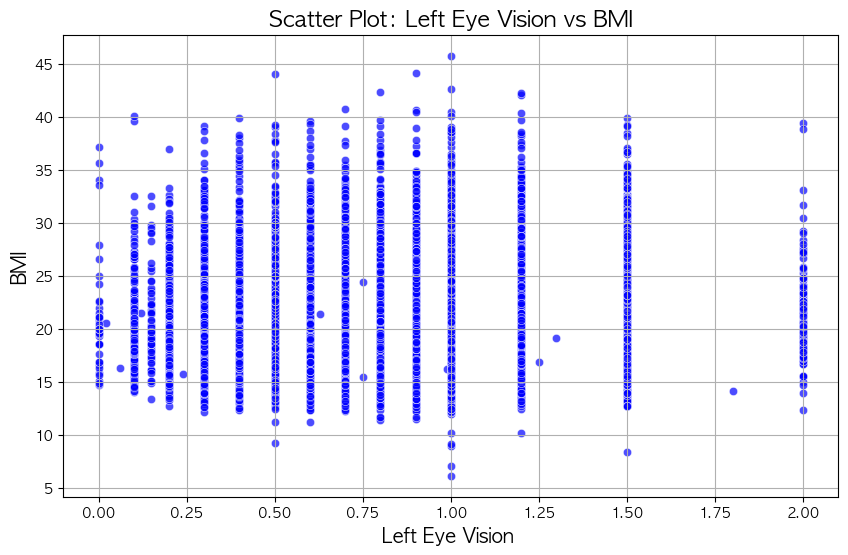

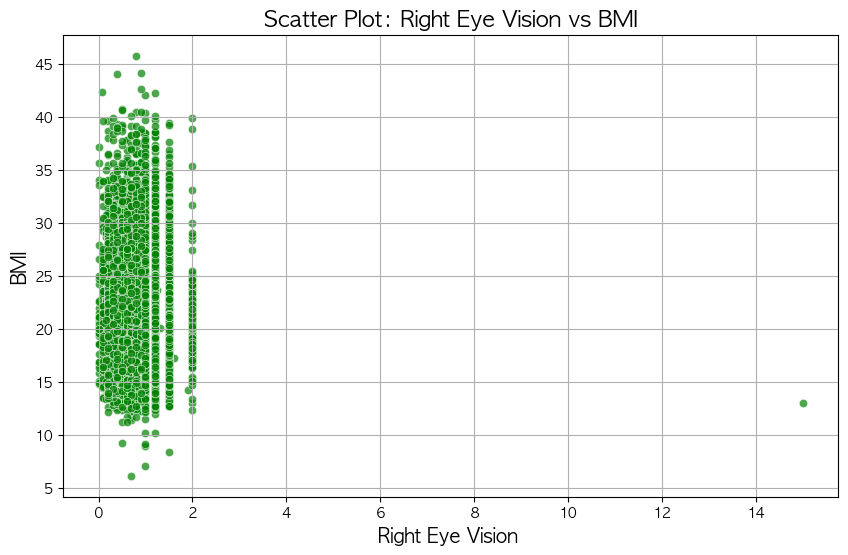

In [69]:
# BMI와 나안시력 산점도
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='시력_나안_좌', y='BMI', alpha=0.7, color='blue')
plt.title('Scatter Plot: Left Eye Vision vs BMI', fontsize=16)
plt.xlabel('Left Eye Vision ', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='시력_나안_우', y='BMI', alpha=0.7, color='green')
plt.title('Scatter Plot: Right Eye Vision vs BMI', fontsize=16)
plt.xlabel('Right Eye Vision ', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(True)
plt.show()

In [74]:
# 나안시력 그룹별 BMI 평균 비교
filtered_data['시력_나안_좌_그룹'] = pd.cut(
    filtered_data['시력_나안_좌'], bins=[0, 0.5, 1.0, 1.5, 2.0], labels=['Low', 'Moderate', 'High', 'Very High']
)
grouped_stats = filtered_data.groupby('시력_나안_좌_그룹', observed=False)['BMI'].mean()  # observed=False 명시
print("\nLeft Eye Vision Group vs. Mean BMI:")
print(grouped_stats)

filtered_data['시력_나안_우_그룹'] = pd.cut(
    filtered_data['시력_나안_우'], bins=[0, 0.5, 1.0, 1.5, 2.0], labels=['Low', 'Moderate', 'High', 'Very High']
)
grouped_stats_right = filtered_data.groupby('시력_나안_우_그룹', observed=False)['BMI'].mean()  # observed=False 명시
print("\nRight Eye Vision Group vs. Mean BMI:")
print(grouped_stats_right)



Left Eye Vision Group vs. Mean BMI:
시력_나안_좌_그룹
Low          20.491178
Moderate     19.675173
High         19.998796
Very High    21.258899
Name: BMI, dtype: float64

Right Eye Vision Group vs. Mean BMI:
시력_나안_우_그룹
Low          20.565406
Moderate     19.688525
High         19.921796
Very High    20.833331
Name: BMI, dtype: float64
